In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
species = pd.read_csv('species_info.csv')
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [3]:
obs = pd.read_csv('observations.csv')
obs

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


# What is the distribution of conservation_status for animals?

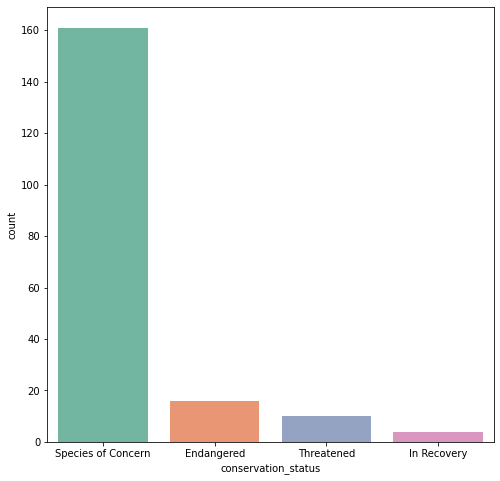

In [4]:
fig, ax = plt.subplots(figsize = (8,8))
sns.set_palette('Set2')
sns.countplot(x = 'conservation_status',data = species )

160 species are of concern, 20 are endangered, 10 are threatened but only 5 are in recovery. This is small comparing to 5000 species not endangered at all.

# Are certain types of species more likely to be endangered?

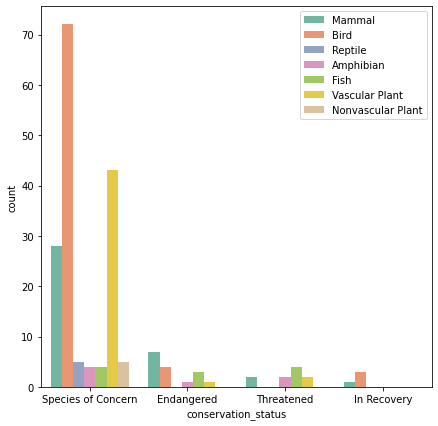

In [10]:
fig, ax = plt.subplots(figsize = (7,7))
sns.set_palette('Set2')
sns.countplot(data = species, x = 'conservation_status', hue = 'category')
plt.legend(loc = 'upper right')

Birds are much more likely to be species of concern, vascular plants being the runner ups and mammals in the 3rd place. Other categories of conservation don'y show such obvious preferences.

In [11]:
species.conservation_status = species.conservation_status.fillna('not protected')
species['protected'] = (species.conservation_status != ('not protected'))

In [37]:
grouped = species.groupby(['category', 'protected']).scientific_name.count().reset_index().pivot(
    columns = 'protected',
  index = 'category',
  values = 'scientific_name'
).reset_index()

grouped.columns = ['category', 'not protected', 'protected']
grouped['% protected'] = grouped.protected/(grouped['not protected'] + grouped['protected'])*100
grouped

,category,not protected,protected,% protected
0,Amphibian,73,7,8.750000
1,Bird,442,79,15.163148
2,Fish,116,11,8.661417
3,Mammal,176,38,17.757009
4,Nonvascular Plant,328,5,1.501502
5,Reptile,74,5,6.329114
6,Vascular Plant,4424,46,1.029083


can be seen here that mammals are actually more likely to be protected than birds.

# Are the differences between species and their conservation status significant?
Need to conduct chi2 test to confirm.

In [39]:
from scipy.stats import chi2_contingency

In [46]:
Xtab = pd.crosstab(species.category, species.protected)
Xtab

protected,False,True
category,,
Amphibian,73,7
Bird,442,79
Fish,116,11
Mammal,176,38
Nonvascular Plant,328,5
Reptile,74,5
Vascular Plant,4424,46


In [73]:
p_dict = {}
for i in range(len(Xtab)):
    for j in range(i+1,len(Xtab)):
        chi2, p, dof, expected = chi2_contingency(Xtab[i:j])
        try:
            p_dict['{} and {}'.format(Xtab.index[i], Xtab.index[j])] = (p, chi2)
        except IndexError:
            p_dict[Xtab.index[i]] = (p, chi2)
     
    for key, value in list(p_dict.items()):
        if p_dict[key][0] == 1.0:
            p_dict.pop(key)
p_dict

{'Amphibian and Fish': (0.17582779760374145, 1.8325402556663934),
 'Amphibian and Mammal': (0.06836327774273099, 5.365838947257894),
 'Amphibian and Nonvascular Plant': (0.0527679302639631, 7.694417628410033),
 'Amphibian and Reptile': (2.1330250691779317e-10, 51.094470699645214),
 'Amphibian and Vascular Plant': (2.1837677874037658e-10, 53.91313782804808),
 'Bird and Mammal': (0.07897198996788664, 3.085932418313973),
 'Bird and Nonvascular Plant': (0.07003845279112098, 5.317421724338809),
 'Bird and Reptile': (7.740841863646865e-11, 50.064393604916376),
 'Bird and Vascular Plant': (8.37289117431602e-11, 53.036575125915725),
 'Fish and Nonvascular Plant': (0.031145264082780604, 4.644937895246063),
 'Fish and Reptile': (6.881563707787097e-11, 46.79918022741111),
 'Fish and Vascular Plant': (2.0889054237325357e-10, 48.03926163572787),
 'Mammal and Reptile': (1.6818930744695664e-11, 45.309986795376076),
 'Mammal and Vascular Plant': (2.4644902707361524e-11, 48.85290204708557),
 'Nonvascul

Amphibian and Reptile, Amphibian and Vascular Plant, Bird and Reptile, Bird and Vascular Plant, Fish and Nonvascular Plant, Fish and Reptile, Fish and Vascular Plant, Mammal and Reptile, Mammal and Vascular Plant, Nonvascular Plant and Vascular Plant all have significant p-values, meaning they are statistically different.

Most of the comparisons have birds and mammals in them: they are statistically different, because they are the biggest category in the group. Chi2 values for these groups are also bigger than 4 meaning that some animal categories are linked to being protected.

# Which species were spotted the most at each park?

In [81]:
obs

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [86]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species[species.category == "Bird"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

common_Names

[['Brewsters', 'Warbler'],
 ['Coopers', 'Hawk'],
 ['Northern', 'Goshawk'],
 ['SharpShinned', 'Hawk'],
 ['Golden', 'Eagle'],
 ['RedTailed', 'Hawk'],
 ['RedShouldered', 'Hawk'],
 ['BroadWinged', 'Hawk'],
 ['Northern', 'Harrier'],
 ['American', 'SwallowTailed', 'Kite', 'SwallowTailed', 'Kite'],
 ['Bald', 'Eagle'],
 ['Mississippi', 'Kite'],
 ['Turkey', 'Vulture'],
 ['Black', 'Vulture'],
 ['Osprey'],
 ['Wood', 'Duck'],
 ['Northern', 'Pintail'],
 ['American', 'Wigeon'],
 ['Northern', 'Shoveler'],
 ['GreenWinged', 'Teal'],
 ['BlueWinged', 'Teal'],
 ['Mallard'],
 ['American', 'Black', 'Duck'],
 ['Lesser', 'Scaup'],
 ['Redhead'],
 ['RingNecked', 'Duck'],
 ['Brant'],
 ['Canada', 'Goose'],
 ['Bufflehead'],
 ['Common', 'Goldeneye'],
 ['Snow', 'Goose'],
 ['Harlequin', 'Duck'],
 ['Hooded', 'Merganser'],
 ['WhiteWinged', 'Scoter'],
 ['WhiteWinged', 'Scoter'],
 ['Black', 'Scoter'],
 ['Common', 'Merganser'],
 ['RedBreasted', 'Merganser'],
 ['Ruddy', 'Duck'],
 ['Chimney', 'Swift'],
 ['RubyThroated', 'Hu

In [89]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in common_Names))
res

['Brewsters',
 'Warbler',
 'Coopers',
 'Hawk',
 'Northern',
 'Goshawk',
 'SharpShinned',
 'Hawk',
 'Golden',
 'Eagle',
 'RedTailed',
 'Hawk',
 'RedShouldered',
 'Hawk',
 'BroadWinged',
 'Hawk',
 'Northern',
 'Harrier',
 'American',
 'SwallowTailed',
 'Kite',
 'SwallowTailed',
 'Kite',
 'Bald',
 'Eagle',
 'Mississippi',
 'Kite',
 'Turkey',
 'Vulture',
 'Black',
 'Vulture',
 'Osprey',
 'Wood',
 'Duck',
 'Northern',
 'Pintail',
 'American',
 'Wigeon',
 'Northern',
 'Shoveler',
 'GreenWinged',
 'Teal',
 'BlueWinged',
 'Teal',
 'Mallard',
 'American',
 'Black',
 'Duck',
 'Lesser',
 'Scaup',
 'Redhead',
 'RingNecked',
 'Duck',
 'Brant',
 'Canada',
 'Goose',
 'Bufflehead',
 'Common',
 'Goldeneye',
 'Snow',
 'Goose',
 'Harlequin',
 'Duck',
 'Hooded',
 'Merganser',
 'WhiteWinged',
 'Scoter',
 'WhiteWinged',
 'Scoter',
 'Black',
 'Scoter',
 'Common',
 'Merganser',
 'RedBreasted',
 'Merganser',
 'Ruddy',
 'Duck',
 'Chimney',
 'Swift',
 'RubyThroated',
 'Hummingbird',
 'ChuckWillsWidow',
 'WhipPoo

In [91]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False)

,Word,Count
25,Warbler,60
36,Sparrow,30
134,Northern,21
313,American,21
404,Owl,19
...,...,...
210,Yellowthroat,1
208,Audubons,1
207,BlackAndWhite,1
205,Caracara,1


In [100]:
species['is_warbler'] = species.common_names.str.contains(r"\bWarbler\b", regex = True)


In [96]:
warb_observations = obs.merge(species[species.is_warbler])
warb_observations.groupby('park_name').observations.sum().reset_index()
obs_by_park = warb_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,5565
1,Bryce National Park,True,195
2,Great Smoky Mountains National Park,False,4290
3,Great Smoky Mountains National Park,True,145
4,Yellowstone National Park,False,13995
5,Yellowstone National Park,True,492
6,Yosemite National Park,False,8441
7,Yosemite National Park,True,271


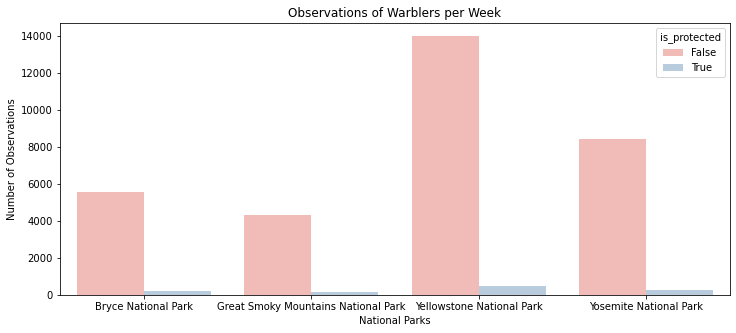

In [99]:
plt.figure(figsize=(12, 5))
sns.barplot(x=obs_by_park.park_name, y= obs_by_park.observations, hue=obs_by_park.is_protected, palette = 'Pastel1')
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Warblers per Week')
plt.show()